In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import os
import re

In [3]:
reviews_train = []
for line in open('C:/Users/SOUMYA/Downloads/movie_data.tar/movie_data/movie_data/full_train.txt', encoding="utf8"):
    
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('C:/Users/SOUMYA/Downloads/movie_data.tar/movie_data/movie_data/full_test.txt', encoding="utf8"):
    
    reviews_test.append(line.strip())

In [4]:
reviews_train[5]

"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

In [5]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

In [6]:
def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

In [7]:
reviews_train_clean[5]

'this isnt the comedic robin williams nor is it the quirky insane robin williams of recent thriller fame this is a hybrid of the classic drama without over dramatization mixed with robins new love of the thriller but this isnt a thriller per se this is more a mystery suspense vehicle through which williams attempts to locate a sick boy and his keeper also starring sandra oh and rory culkin this suspense drama plays pretty much like a news report until williams character gets close to achieving his goal i must say that i was highly entertained though this movie fails to teach guide inspect or amuse it felt more like i was watching a guy williams as he was actually performing the actions from a third person perspective in other words it felt real and i was able to subscribe to the premise of the story all in all its worth a watch though its definitely not friday saturday night fare it rates a   from the fiend '

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target = [1 if i < 12500 else 0 for i in range(25000)]

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

C:\Users\SOUMYA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.87744
Accuracy for C=0.05: 0.88256
Accuracy for C=0.25: 0.88144
Accuracy for C=0.5: 0.87984
Accuracy for C=1: 0.87792


In [10]:
for c in [0.05,0.06, 0.08, 0.1, 0.15, 0.2]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.05: 0.88256
Accuracy for C=0.06: 0.8824
Accuracy for C=0.08: 0.8816
Accuracy for C=0.1: 0.88224
Accuracy for C=0.15: 0.88288
Accuracy for C=0.2: 0.88192


In [11]:
final_model = LogisticRegression(C=0.06)
final_model.fit(X, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_model.predict(X_test)))

Final Accuracy: 0.8812


## Removing Stop words

This can be done by a couple of ways:
1. using stop words from nltk and making an udf to remove words
2. using manual stop words and making an udf to remove words
3. using countVectorizer

## Stemming vs Lemmatization
The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [26]:
def get_lemmatized_text(corpus):
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]
lemmatized_reviews_train = get_lemmatized_text(reviews_train_clean)
lemmatized_reviews_test = get_lemmatized_text(reviews_test_clean)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'this isnt the comedic robin williams nor is it the quirky insane robin williams of recent thriller fame this is a hybrid of the classic drama without over dramatization mixed with robin new love of the thriller but this isnt a thriller per se this is more a mystery suspense vehicle through which williams attempt to locate a sick boy and his keeper also starring sandra oh and rory culkin this suspense drama play pretty much like a news report until williams character get close to achieving his goal i must say that i wa highly entertained though this movie fails to teach guide inspect or amuse it felt more like i wa watching a guy williams a he wa actually performing the action from a third person perspective in other word it felt real and i wa able to subscribe to the premise of the story all in all it worth a watch though it definitely not friday saturday night fare it rate a from the fiend'

In [28]:
print('before lemmatization\n------------------------\n',reviews_train_clean[5],'\n\nafter lemmatization\n------------------------\n',lemmatized_reviews_train[5])

before lemmatization
------------------------
 this isnt the comedic robin williams nor is it the quirky insane robin williams of recent thriller fame this is a hybrid of the classic drama without over dramatization mixed with robins new love of the thriller but this isnt a thriller per se this is more a mystery suspense vehicle through which williams attempts to locate a sick boy and his keeper also starring sandra oh and rory culkin this suspense drama plays pretty much like a news report until williams character gets close to achieving his goal i must say that i was highly entertained though this movie fails to teach guide inspect or amuse it felt more like i was watching a guy williams as he was actually performing the actions from a third person perspective in other words it felt real and i was able to subscribe to the premise of the story all in all its worth a watch though its definitely not friday saturday night fare it rates a   from the fiend  

after lemmatization
----------

## n-grams

In [29]:
cv = CountVectorizer(binary=True, ngram_range=(1, 2))
cv.fit(lemmatized_reviews_train)
X = cv.transform(lemmatized_reviews_train)
X_test = cv.transform(lemmatized_reviews_test)

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.01, 0.05,0.06,0.07,0.08, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))
    
final_lemmatized = LogisticRegression(C=0.25)
final_lemmatized.fit(X, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_lemmatized.predict(X_test)))

C:\Users\SOUMYA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.88384
Accuracy for C=0.05: 0.89184
Accuracy for C=0.06: 0.89248
Accuracy for C=0.07: 0.89296
Accuracy for C=0.08: 0.8928
Accuracy for C=0.25: 0.8944
Accuracy for C=0.5: 0.89424
Accuracy for C=1: 0.89376
Final Accuracy: 0.89792


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(reviews_train_clean)
X = tfidf_vectorizer.transform(reviews_train_clean)
X_test = tfidf_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

C:\Users\SOUMYA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.79424
Accuracy for C=0.05: 0.83168
Accuracy for C=0.25: 0.86992
Accuracy for C=0.5: 0.87872
Accuracy for C=1: 0.888


## Support Vector Machines (SVM)

In [31]:
from sklearn.svm import LinearSVC
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

C:\Users\SOUMYA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.89136
Accuracy for C=0.05: 0.89104
Accuracy for C=0.25: 0.88816
Accuracy for C=0.5: 0.8872
Accuracy for C=1: 0.88704


## Final Model

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3), stop_words=stop_words)
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.001, 0.005, 0.01, 0.05, 0.1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

C:\Users\SOUMYA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.001: 0.8808
Accuracy for C=0.005: 0.88528
Accuracy for C=0.01: 0.88704
Accuracy for C=0.05: 0.88592
Accuracy for C=0.1: 0.88608


In [33]:
final = LinearSVC(C=0.1)
final.fit(X, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final.predict(X_test)))

Final Accuracy: 0.89944


In [35]:

feature_to_coef = {
    word: coef for word, coef in zip(
        ngram_vectorizer.get_feature_names(), final.coef_[0]
    )
}

positive_words=[]

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:30]:
    positive_words.append(best_positive[0])

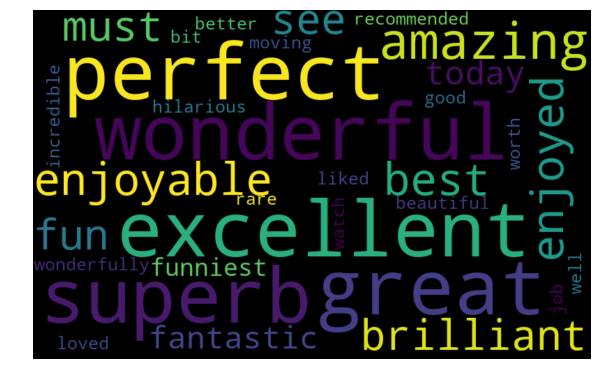

In [36]:
best_positive_words = ' '.join(positive_words)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(best_positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

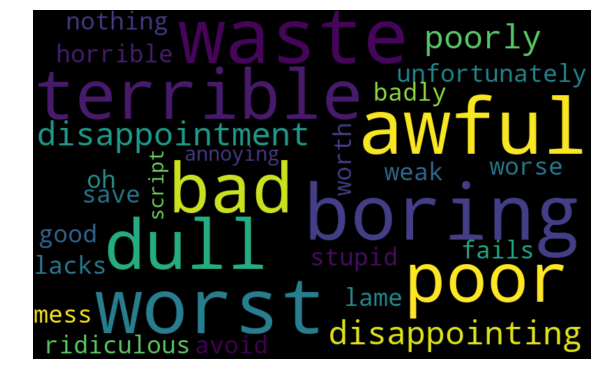

In [38]:
negative_words=[]
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=False)[:30]:
    negative_words.append(best_negative[0])
best_neg_words = ' '.join(negative_words)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(best_neg_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()